In [16]:
import pandas as pd
import numpy as np

from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error,r2_score

import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [5]:
boston=pd.read_csv("BostonHousing.csv")
cols=[i.upper() for i in df.columns]
boston.columns=cols

In [7]:
y=boston.pop("MEDV")
X=boston

In [9]:
y[1:10]

1    21.6
2    34.7
3    33.4
4    36.2
5    28.7
6    22.9
7    27.1
8    16.5
9    18.9
Name: MEDV, dtype: float64

In [10]:
X_train,X_test,y_train,y_test=train_test_split(X, y, test_size=0.2)

## Model Training and evaluation

In [12]:
gr = GradientBoostingRegressor(max_depth=2,n_estimators=3,learning_rate=1)

In [13]:
model=gr.fit(X_train,y_train)
y_pred=model.predict(X_test)

In [14]:
r2_score(y_test,y_pred)

0.6647112425116419

### Boosting also have feature importance in it

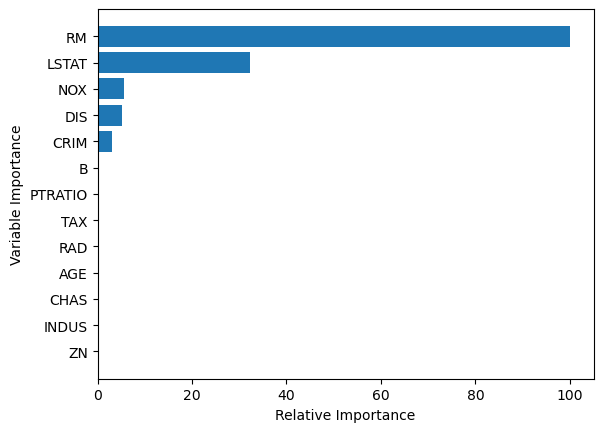

In [27]:
feature_importance = model.feature_importances_
features=boston.columns
# # make importance relative to max importance
feature_importance= 100.0 * (feature_importance/feature_importance.max())
sorted_idx= np.argsort(feature_importance)
pos= np.arange(sorted_idx.shape[0]) + 0.5
plt.barh(pos,feature_importance[sorted_idx],align="center")
plt.yticks(pos,features[sorted_idx])
plt.xlabel("Relative Importance")
plt.ylabel("Variable Importance")
plt.show()

In [31]:
# CRIM - per capita crime rate by town

# ZN - proportion of residential land zoned for lots over 25,000 sq.ft.

# INDUS - proportion of non-retail business acres per town.

# CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)

# NOX - nitric oxides concentration (parts per 10 million)

# RM - average number of rooms per dwelling

# AGE - proportion of owner-occupied units built prior to 1940

# DIS - weighted distances to five Boston employment centres

# RAD - index of accessibility to radial highways

# TAX - full-value property-tax rate per $10,000

# PTRATIO - pupil-teacher ratio by town

# B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town

# LSTAT - % lower status of the population

# MEDV - Median value of owner-occupied homes in $1000's

## Hyperparmeter tuning
* as we provide default parameters

In [41]:
from sklearn.model_selection import GridSearchCV,KFold

params= [{"learning_rate":[0.15,0.1,.05],'n_estimators':[100,150,200]}]
folds= KFold(n_splits=5,shuffle=True,random_state=100)

gr = GradientBoostingRegressor()
tune= GridSearchCV(estimator=gr,param_grid=params,cv=folds,scoring="r2",verbose=1)

In [42]:
tune.fit(X_train,y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=100, shuffle=True),
             estimator=GradientBoostingRegressor(),
             param_grid=[{'learning_rate': [0.15, 0.1, 0.05],
                          'n_estimators': [100, 150, 200]}],
             scoring='r2', verbose=1)

In [44]:
tune.best_params_

{'learning_rate': 0.15, 'n_estimators': 100}

In [45]:
tune.best_score_

0.8744597352636359

In [47]:
n_gr= GradientBoostingRegressor(learning_rate= 0.15, n_estimators= 100)
m1=n_gr.fit(X_train,y_train)

In [48]:
y_pred=m1.predict(X_test)
r2_score(y_test,y_pred)

0.8852701323368009

In [49]:
mean_absolute_error(y_test,y_pred)

2.1294073979999615